#### Import the nessarly liberaris liberaries 

In [ ]:
import numpy as np
import os 
from matplotlib import pyplot as plt
import cv2
import random
import pickle

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

from IPython.display import Image


#### Tetch the training image data

In [ ]:


file_list = []
class_list = []

DATADIR = "../data/train/train_letter_data"

# We can list all the categories we want to identify in our neural network here
# In our case we only have three alphabets to detect
CATEGORIES = ["ha", "le", "me"]

# Let us fix he size of the images that the neural network will use
IMG_SIZE = 50

# Checking  all images in the data folder
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        #print(img)
        img_array = cv2.imread(os.path.join(path, img), 
                               cv2.IMREAD_GRAYSCALE)
training_data = []


In [ ]:
DATADIR = "../data/validation/validate_letter_data/me"
img= "me15.jpg" 
confused_img = os.path.join(DATADIR, img)
Image(filename=confused_img) 

#### Pepare the image data for training


In [3]:
def create_training_data():
    for category in CATEGORIES :
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            if img.endswith(".DS_Store"):
                pass
            else:
                try :
                    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    training_data.append([new_array, class_num])
                except Exception as e:
                    pass

create_training_data()

random.shuffle(training_data)

X = [] #features
y = [] #labels

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Creating the files containing all the information about our model
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)



#### Building the convolutional neural network model and save it as pickle file


In [5]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 56 samples, validate on 7 samples
Epoch 1/40
56/56 [==============================] - 1s 14ms/sample - loss: 1.0903 - acc: 0.3571 - val_loss: 1.2342 - val_acc: 0.0000e+00
Epoch 2/40
56/56 [==============================] - 0s 5ms/sample - loss: 1.0424 - acc: 0.4464 - val_loss: 1.2557 - val_acc: 0.0000e+00
Epoch 3/40
56/56 [==============================] - 0s 4ms/sample - loss: 1.0531 - acc: 0.4464 - val_loss: 1.1947 - val_acc: 0.1429
Epoch 4/40
56/56 [==============================] - 0s 5ms/sample - loss: 1.0332 - acc: 0.5179 - val_loss: 1.1322 - val_acc: 0.2857
Epoch 5/40
56/56 [==============================] - 0s 4ms/sample - loss: 1.0137 - acc: 0.5179 - val_loss: 1.2176 - val_acc: 0.0000e+00
Epoch 6/40
56/56 [==============================] - 0s 9ms/sample - loss: 0.9967 - acc: 0.4643 - 

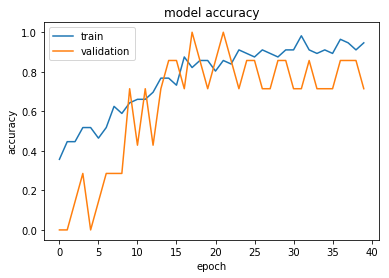

In [6]:
# normalizing data (a pixel goes from 0 to 255)
X = X/255.0

# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 13 neurons, for 13 classes
model.add(Dense(3))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X, y, batch_size=32, epochs=40, validation_split=0.1)

# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')

# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

- The model has pretty much good performance:
- - Observing the gap between the training and validation plot, we can see that the model has not suffer with overfitting.
- - It has an accuracy (*You are right accuracy is not a good measure for classification problem*) 95% on training  and 71% on the validation accuracy. 
- - Given the small amount of dataset we have used for training the model (only 56 samples on training data is a minimal amount), we can safely say that the model performs pretty decent.
- Let's see how the model performs on the additional validation data (the data that the model has never been 'seen' before).

#### Predicting an Amharic alphabet name [class]


In [9]:
TESTDATADIR = "../data/validation/validate_letter_data"

# In this conext ha, le and me are represneted with 0, 1, and 2
for category in CATEGORIES :
        path = os.path.join(TESTDATADIR, category)
        class_num = CATEGORIES.index(category)
        print(path, class_num)


../data/validation/validate_letter_data/ha 0
../data/validation/validate_letter_data/le 1
../data/validation/validate_letter_data/me 2


##### Batch testing 

In [13]:

CATEGORIES = ["ha", "le", "me"]
original_letter = lambda x : "Ha (ሀ)" if x ==0 else ("Le (ለ)" if x == 1 else "Me (መ)")
pridicted_letter = lambda x : "Ha (ሀ)" if x =='ha' else ("Le (ለ)" if x == 'le' else "Me (መ)")

testing_data = []
for category in CATEGORIES :
        path = os.path.join(TESTDATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try :
                new_array=prepare(os.path.join(path, img))
                
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass

# Test each leter
print("   Original ----> Predicted ")
for image in testing_data:
    if image[0] is not None:
        prediction = model.predict([image[0]])
        prediction = list(prediction[0])
        print("\t {} ----> {}"\
              .format(original_letter(image[1]),
                      pridicted_letter(CATEGORIES[prediction.index(max(prediction))])))
 

   Original ----> Predicted 
	 Ha (ሀ) ----> Ha (ሀ)
	 Ha (ሀ) ----> Ha (ሀ)
	 Ha (ሀ) ----> Ha (ሀ)
	 Ha (ሀ) ----> Ha (ሀ)
	 Ha (ሀ) ----> Ha (ሀ)
	 Ha (ሀ) ----> Ha (ሀ)
	 Ha (ሀ) ----> Ha (ሀ)
	 Ha (ሀ) ----> Ha (ሀ)
	 Ha (ሀ) ----> Ha (ሀ)
	 Ha (ሀ) ----> Ha (ሀ)
	 Ha (ሀ) ----> Ha (ሀ)
	 Ha (ሀ) ----> Ha (ሀ)
	 Ha (ሀ) ----> Ha (ሀ)
	 Ha (ሀ) ----> Ha (ሀ)
	 Ha (ሀ) ----> Le (ለ)
	 Le (ለ) ----> Le (ለ)
	 Le (ለ) ----> Le (ለ)
	 Le (ለ) ----> Le (ለ)
	 Le (ለ) ----> Le (ለ)
	 Le (ለ) ----> Le (ለ)
	 Le (ለ) ----> Ha (ሀ)
	 Le (ለ) ----> Ha (ሀ)
	 Le (ለ) ----> Le (ለ)
	 Le (ለ) ----> Le (ለ)
	 Le (ለ) ----> Le (ለ)
	 Le (ለ) ----> Ha (ሀ)
	 Le (ለ) ----> Le (ለ)
	 Le (ለ) ----> Le (ለ)
	 Le (ለ) ----> Le (ለ)
	 Le (ለ) ----> Le (ለ)
	 Le (ለ) ----> Le (ለ)
	 Me (መ) ----> Le (ለ)
	 Me (መ) ----> Me (መ)
	 Me (መ) ----> Me (መ)
	 Me (መ) ----> Le (ለ)
	 Me (መ) ----> Ha (ሀ)
	 Me (መ) ----> Ha (ሀ)
	 Me (መ) ----> Ha (ሀ)
	 Me (መ) ----> Me (መ)
	 Me (መ) ----> Ha (ሀ)
	 Me (መ) ----> Me (መ)
	 Me (መ) ----> Ha (ሀ)
	 Me (መ) ----> Le (ለ)
	 Me (መ) ----> Me (መ)
	 M

- Well, as you can see, the model predicted most of the alphabets correctly. 
- But it has also got confused to identify some of the alphabets images. For instance, when the model wrongly classified one 'Me (መ)' image as 'Ha (ሀ)

In [14]:
## It turns out the misclassified image is too blurry.
TESTDATADIR = "../data/validation/validate_letter_data/me"
img= "me15.jpg" 
confused_img = os.path.join(TESTDATADIR, img)
Image(filename=confused_img) 

#### To test a single file 


In [15]:
import cv2
import tensorflow as tf
CATEGORIES = ["ha", "le", "me"]
def prepare(file):
    #print("new_array", file)

    IMG_SIZE = 50
    if not file.endswith(".DS_Store"):
        img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model("CNN.model")

TESTDATADIR = "../data/validation/validate_letter_data/ha"
img= "ha16.jpg" # You can change your image path

image = prepare(os.path.join(TESTDATADIR, img))

prediction = model.predict([image])
prediction = list(prediction[0])
print("Original letter: {}\n Predicted lettter: {}"\
      .format(img,CATEGORIES[prediction.index(max(prediction))]))



Original letter: ha16.jpg
 Predicted lettter: ha
